In [2]:
from census import Census

import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import pingouin as pg
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
minorsongs = df.loc[df['mode']==0].groupby('year')['id'].count()
minorsongs

year
1920     127
1921      52
1922      41
1923      39
1924      58
        ... 
2017     843
2018    1132
2019     929
2020    1751
2021     750
Name: id, Length: 102, dtype: int64

In [5]:
majorsongs=df.loc[df['mode']==1].groupby('year')['id'].count()
majorsongs

year
1920     222
1921     104
1922      80
1923     146
1924     178
        ... 
2017    1313
2018    1582
2019    1400
2020    2543
2021    1090
Name: id, Length: 102, dtype: int64

In [6]:
main_df = pd.DataFrame(minorsongs).rename(columns={'id':'minor songs'})

In [7]:
main_df['major songs'] = majorsongs

In [8]:
main_df

,minor songs,major songs
year,,
1920,127,222
1921,52,104
1922,41,80
1923,39,146
1924,58,178
...,...,...
2017,843,1313
2018,1132,1582
2019,929,1400


<AxesSubplot:xlabel='year'>

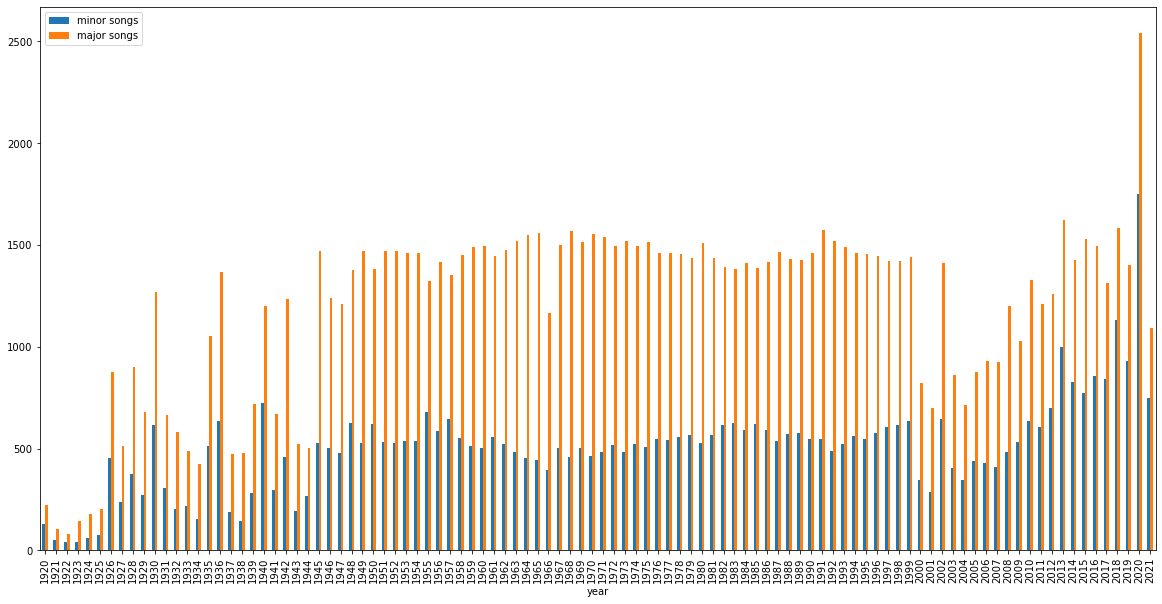

In [9]:
main_df.plot(kind="bar",figsize=(20,10))

In [10]:
minorpopularity = df[df['mode']==0]
minorpopularity.popularity.mean()

25.436253636731468

In [11]:
majorpopularity = df[df['mode']==1]
majorpopularity.popularity.mean()

25.802331656978645

In [12]:
stats.ttest_ind(minorpopularity.popularity, majorpopularity.popularity, equal_var=False)

Ttest_indResult(statistic=-3.1243303916471707, pvalue=0.0017826496226173453)

<AxesSubplot:title={'center':'popularity'}, xlabel='mode'>

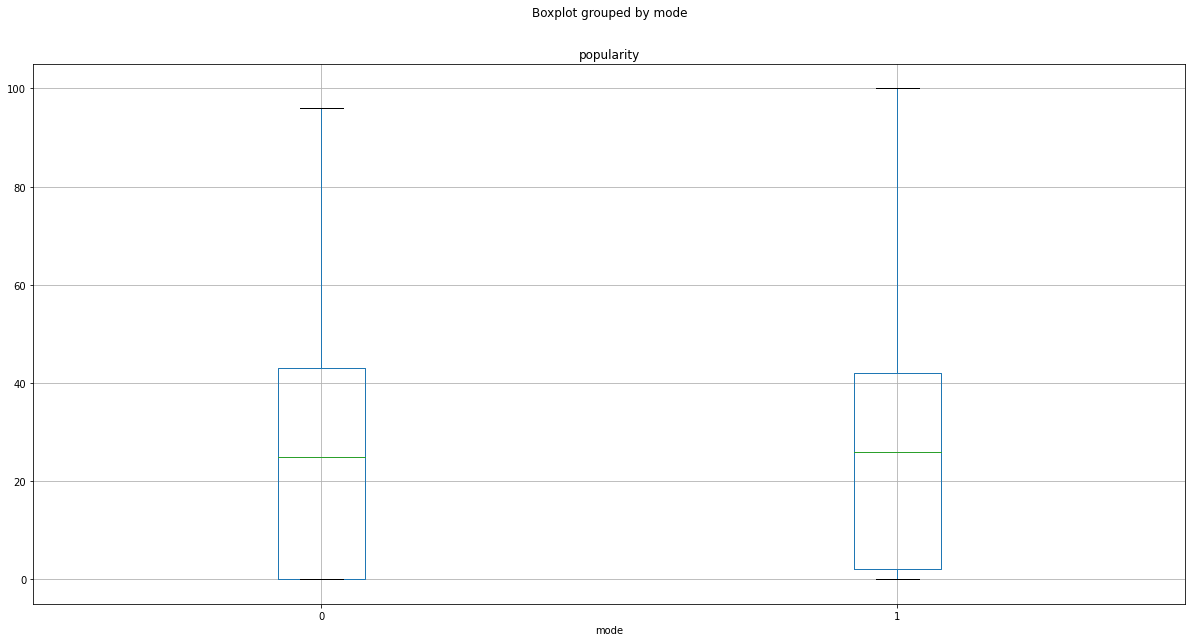

In [13]:
df.boxplot('popularity',by='mode',figsize=(20,10))

In [14]:
group1 = df[df['mode'] == 1]['popularity']
group2 = df[df['mode'] == 0]['popularity']
stats.f_oneway(group1, group2)

F_onewayResult(statistic=10.212076439517753, pvalue=0.0013954883149110233)

In [17]:
main_df

,minor songs,major songs
year,,
1920,127,222
1921,52,104
1922,41,80
1923,39,146
1924,58,178
...,...,...
2017,843,1313
2018,1132,1582
2019,929,1400


In [18]:
main_df['total'] = minorsongs + majorsongs

In [19]:
main_df['minor song %'] = 100*(main_df['minor songs']/main_df['total'])

In [20]:
main_df['major song %'] = 100 - main_df['minor song %']

In [21]:
main_df

,minor songs,major songs,total,minor song %,major song %
year,,,,,
1920,127,222,349,36.389685,63.610315
1921,52,104,156,33.333333,66.666667
1922,41,80,121,33.884298,66.115702
1923,39,146,185,21.081081,78.918919
1924,58,178,236,24.576271,75.423729
...,...,...,...,...,...
2017,843,1313,2156,39.100186,60.899814
2018,1132,1582,2714,41.709654,58.290346
2019,929,1400,2329,39.888364,60.111636


<AxesSubplot:xlabel='year'>

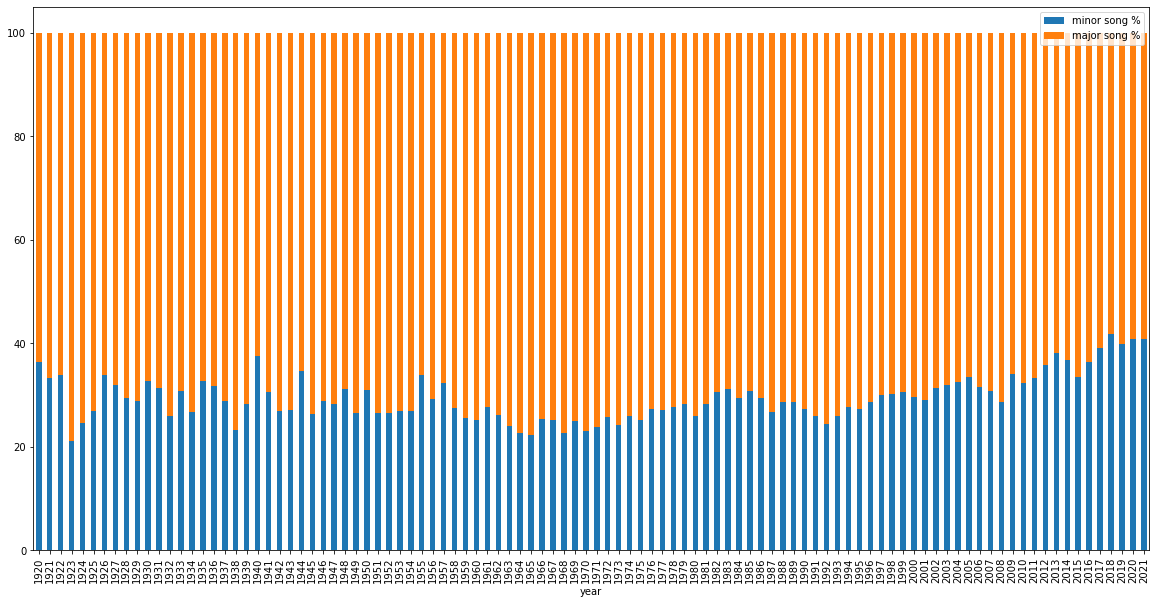

In [22]:
main_df[['minor song %','major song %']].plot(kind='bar',stacked=True,figsize=(20,10))